># 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


>・Home Creditはどのような企業？  
Home Credit BVは、1997年にチェコ共和国で設立され、オランダに本社を置く国際的なノンバンク金融機関である。同社は10か国で事業を展開しており、主に信用履歴がほとんどまたはまったくない人々への融資に重点を置いている。

>・このコンペティションでは何を予測する？  
顧客の返済能力。

>・それを予測することで企業が得られるメリットは何？  
返済可能な顧客が拒否されないようになる。

># 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。
.head()、.info()、describe()などを使う  
欠損値の有無を見る  
クラスの割合がわかるグラフを描く

In [87]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [88]:
application_train = pd.read_csv("application_train.csv")
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [90]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


describe()によって返ってきた表を見ると、値が常にマイナスのデータもあり、データを使いやすく処理する必要があると感じた。

In [91]:
#特徴量ごとに欠損値の数と割合を求めて降順にソートしたデータを返す関数
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [92]:
data_0 = application_train[application_train.TARGET == 0]
data_1 = application_train[application_train.TARGET == 1]

data_0_pct = missing_data(data_0).head(10)
data_1_pct = missing_data(data_1).head(10)
print("返済可能な人達:")
display(data_0_pct)
print("返済困難な人達:")
display(data_1_pct)

返済可能な人達:


,Total,Percent
COMMONAREA_MEDI,196442,69.491238
COMMONAREA_AVG,196442,69.491238
COMMONAREA_MODE,196442,69.491238
NONLIVINGAPARTMENTS_MODE,195187,69.047282
NONLIVINGAPARTMENTS_MEDI,195187,69.047282
NONLIVINGAPARTMENTS_AVG,195187,69.047282
FONDKAPREMONT_MODE,192170,67.980020
LIVINGAPARTMENTS_MEDI,192077,67.947122
LIVINGAPARTMENTS_MODE,192077,67.947122
LIVINGAPARTMENTS_AVG,192077,67.947122


返済困難な人達:


,Total,Percent
COMMONAREA_MODE,18423,74.211480
COMMONAREA_AVG,18423,74.211480
COMMONAREA_MEDI,18423,74.211480
NONLIVINGAPARTMENTS_AVG,18327,73.824773
NONLIVINGAPARTMENTS_MODE,18327,73.824773
NONLIVINGAPARTMENTS_MEDI,18327,73.824773
FONDKAPREMONT_MODE,18125,73.011078
LIVINGAPARTMENTS_MODE,18122,72.998993
LIVINGAPARTMENTS_AVG,18122,72.998993
LIVINGAPARTMENTS_MEDI,18122,72.998993


ラベルが０のデータも１のデータも、欠損値が多い特徴量だと７割前後も欠損値があるため、使うデータをしっかり選別する必要があると感じた。

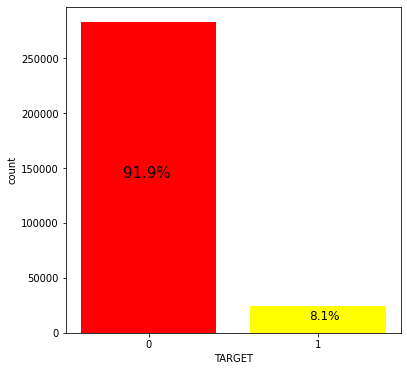

In [93]:
fig,ax = plt.subplots(figsize = (6,6))
ax.bar([0,1],[len(data_0),len(data_1)],color = ["red","yellow"])
ax.set_xticks([0,1])
ax.set_xticklabels([0,1])
ax.text(-0.15,len(data_0)/2,"{:.1f}%".format((len(data_0)/len(data)*100)),size=15)
ax.text(0.95,len(data_1)/2,"{:.1f}%".format((len(data_1)/len(data)*100)),size=12)
ax.set_xlabel("TARGET")
ax.set_ylabel("count")
plt.show()

９割以上をTARGET=0の人が占めている。

># 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

データには年齢、収入に関すること、家などの財産、性別、家族のことまであらゆることがデータ化されているため考えられる仮説はいくつかある。

・返済できない人には収入が少ない人が多い

・返済できない人には独身が多い

・返済できない人には家や車を持っていない人が多い

・年齢も返済できる人かどうかの判断がつけられる指標として見れる可能性がある

># 【問題4】データ探索  
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。

In [94]:
display(data_0["CODE_GENDER"].value_counts())

F      188278
M       94404
XNA         4
Name: CODE_GENDER, dtype: int64

In [101]:
#データ全体での割合とラベル１の割合の差を可視化する
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [98]:
def plot_distribution(var):
    
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();


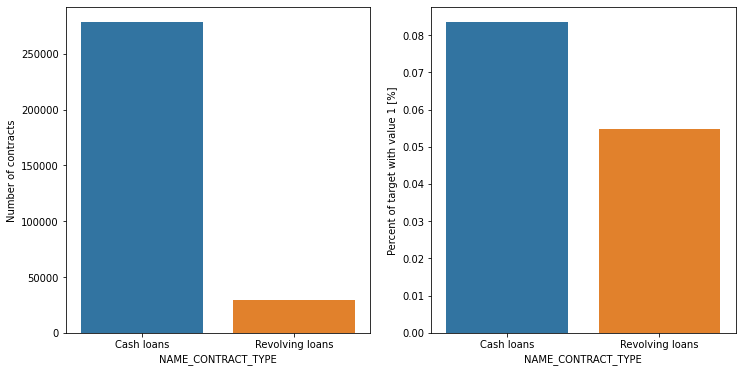

In [99]:
#契約タイプの割合
plot_stats('NAME_CONTRACT_TYPE')

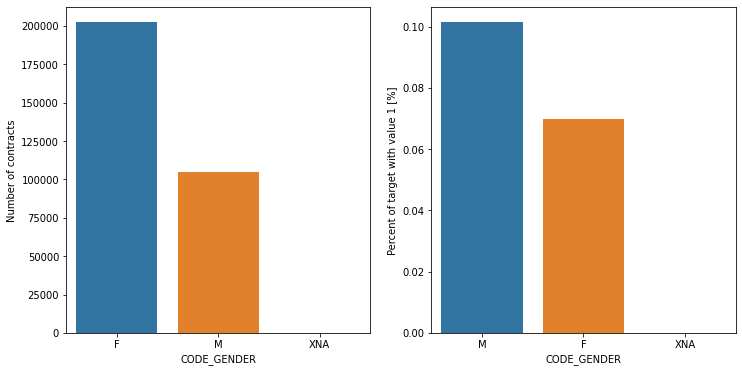

In [102]:
#性別の割合
plot_stats('CODE_GENDER')

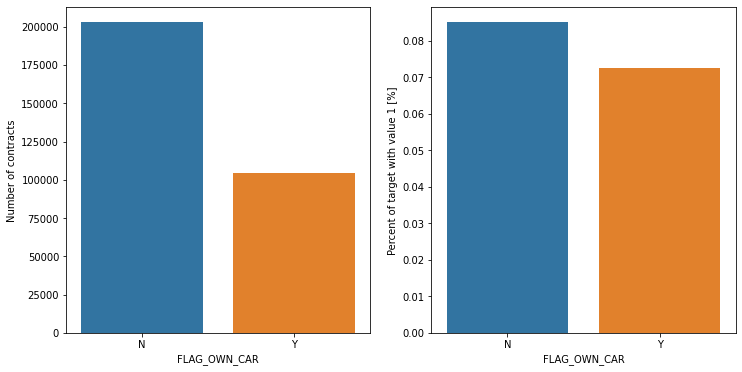

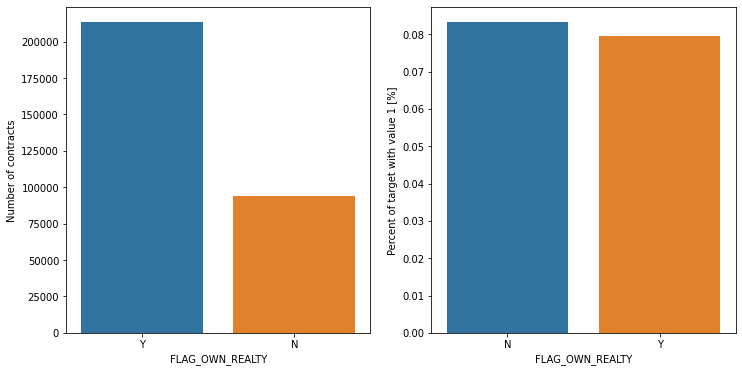

In [103]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

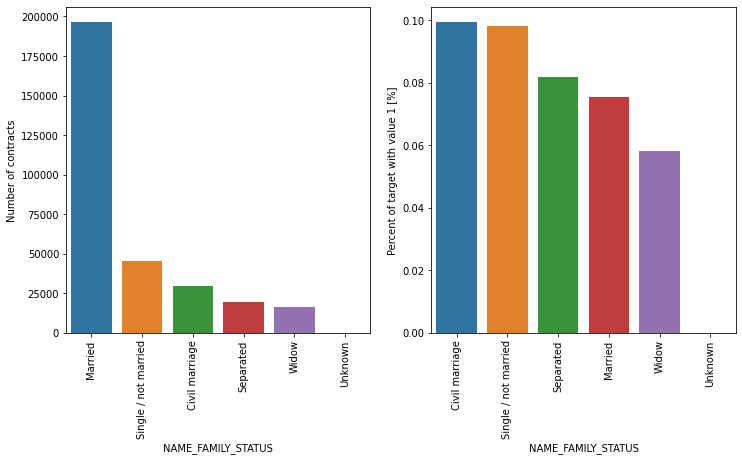

In [108]:
#家族の状態
plot_stats('NAME_FAMILY_STATUS',True, True)

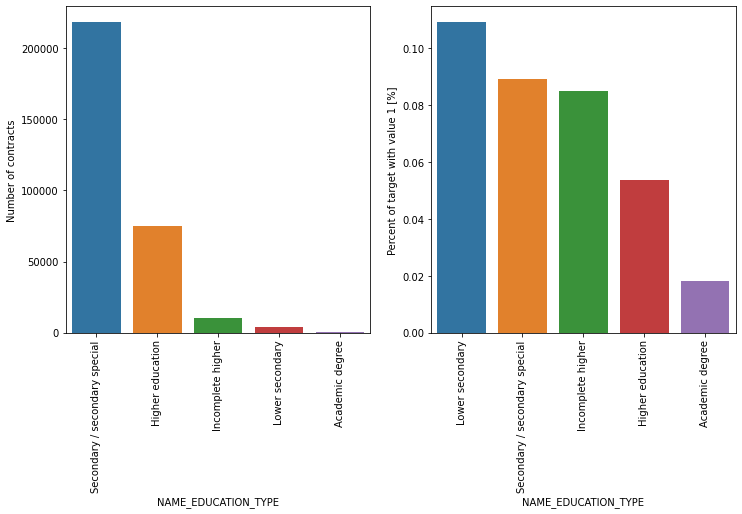

In [110]:
#教育タイプ
plot_stats('NAME_EDUCATION_TYPE',True)

In [111]:
#分散を用いて外れ値を検出する関数
def outlier_2s(df):

    for i in range(len(df.columns)):

        # 列を抽出する
        col = df.iloc[:,i]

        # 平均と標準偏差
        average = np.mean(col)
        sd = np.std(col)

        # 外れ値の基準点
        outlier_min = average - (sd) * 2
        outlier_max = average + (sd) * 2

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df

In [121]:
#外れ値を取り除き、特徴量の分布を表示する関数
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(outlier_2s(pd.DataFrame(application_train[feature])).dropna(),color=color, kde=True,bins=100)
    plt.show()

In [131]:
#外れ値を取り除き、TARGET=0の特徴量の分布を表示する関数
def plot_distribution0(feature,color):
    print("TARGET=0")
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(outlier_2s(pd.DataFrame(data_0[feature])).dropna(),color=color, kde=True,bins=100)
    plt.show()

In [132]:
#外れ値を取り除き、TARGET=1の特徴量の分布を表示する関数
def plot_distribution1(feature,color):
    print("TARGET=1")
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(outlier_2s(pd.DataFrame(data_1[feature])).dropna(),color=color, kde=True,bins=100)
    plt.show()

TARGET=0


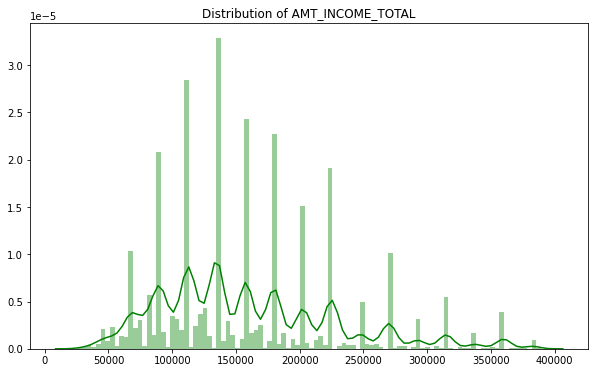

TARGET=1


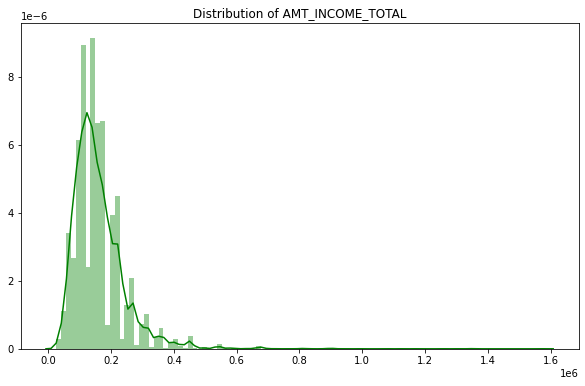

In [133]:
#外れ値を取り除いた収入の分布
plot_distribution0('AMT_INCOME_TOTAL','green')
plot_distribution1('AMT_INCOME_TOTAL','green')

TARGET=0


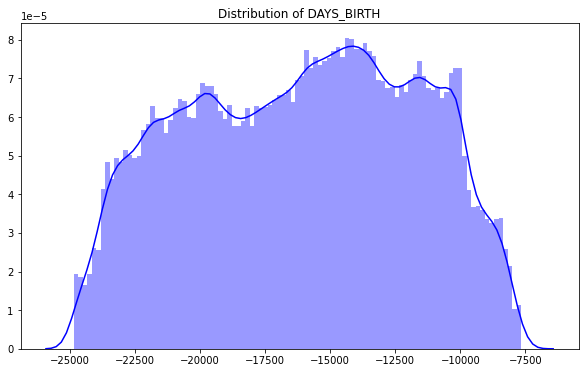

TARGET=1


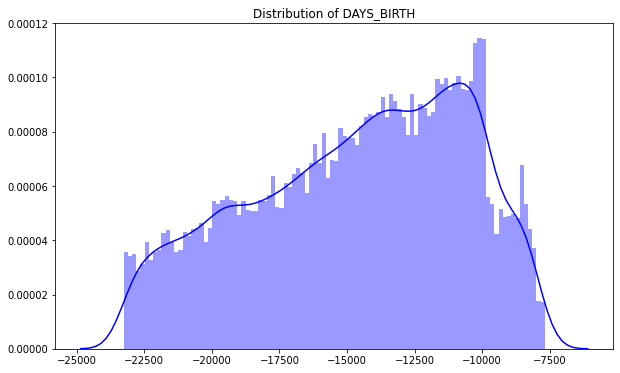

In [135]:
plot_distribution0('DAYS_BIRTH','blue')
plot_distribution1('DAYS_BIRTH','blue')

>### 考察
母集団とTARGET1を比べた時のTARGET1の特徴  
・契約タイプはRevolving loanが多い  
・母集団と比べて、車や家を所有している人の割合が多い  
・民事婚の割合と独身の割合がほぼ同じくらいで最も高く、母集団と比べると結婚している人の割合は少なかった  
・母集団で見ると中等教育の割合は低いが、未返済の人の割合を見ると中等教育の割合が最も高かった  
・やはり母集団と比べて全体的に収入の水準が下がっていた  
・年齢の分布を見てみると、未返済のグループでは年齢が若い層が多いことがわかる  